In [5]:
### Data Analisy Libraries ###
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import inflection

### Machine Learning Libraries ###
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler , RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, mean_squared_error, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, VarianceThreshold, SelectPercentile
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.ensemble      import RandomForestRegressor
from boruta                import BorutaPy

from math import ceil
from pivottablejs import pivot_ui

#auxiliar packages
from IPython.display         import Image
from IPython.core.display    import HTML
from scipy                   import stats
import inflection
import pickle
import warnings
import json
import os
warnings.filterwarnings('ignore')


In [6]:
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    accent = lambda x: inflection.transliterate(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_old = list(map(accent, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df



def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [9]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [12]:
data_train_raw = pd.read_csv('..\\base\\train.csv')

In [13]:
data = data_train_raw.copy()

In [14]:
data = rename_columns(data)

In [15]:
data.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,Satisfied


In [16]:
data.describe()

,id,age,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes
count,"103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,594.00"
mean,"64,924.21",39.38,"1,189.45",2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,"37,463.81",15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.70
min,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,"32,533.75",27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,"64,856.50",40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,"97,368.25",51.00,"1,743.00",4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,"129,880.00",85.00,"4,983.00",5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,"1,592.00","1,584.00"


In [18]:
data.isna().sum()

id                              0
gender                          0
customer_type                   0
age                             0
type_of_purchase                0
store_size                      0
store_distance                  0
in_store_wifi                   0
open/close_time_convenient      0
easy_of_online_shopping         0
store_location                  0
toilet_cleaning                 0
dressing_room                   0
waiting_room                    0
kids_entertainment              0
seller_service                  0
showroom                        0
self_store                      0
purchase_service                0
store_service                   0
cleanliness                     0
carrier_delay_in_minutes        0
delivery_delay_in_minutes     310
satisfaction                    0
dtype: int64

In [21]:
print(data.shape[0])

103904


In [17]:
num_attributes = data.select_dtypes( include=['int64', 'float64'] )
cat_attributes = data.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [25]:
cat_attributes.head()

,gender,customer_type,type_of_purchase,store_size,satisfaction
0,Male,Loyal Customer,Personal,Small,Neutral or Dissatisfaction
1,Male,disloyal Customer,Gift,Large,Neutral or Dissatisfaction
2,Female,Loyal Customer,Gift,Large,Satisfied
3,Female,Loyal Customer,Gift,Large,Neutral or Dissatisfaction
4,Male,Loyal Customer,Gift,Large,Satisfied


In [22]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

gender              2
customer_type       2
type_of_purchase    2
store_size          3
satisfaction        2
dtype: int64

In [32]:
cat_attributes['satisfaction'].unique()

array(['Neutral or Dissatisfaction', 'Satisfied'], dtype=object)

In [28]:
cat_attributes.columns

Index(['gender', 'customer_type', 'type_of_purchase', 'store_size',
       'satisfaction'],
      dtype='object')

In [24]:
num_attributes.head()

,id,age,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00


In [26]:
data['satisfaction'].value_counts()

Neutral or Dissatisfaction    58879
Satisfied                     45025
Name: satisfaction, dtype: int64

In [44]:
data.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,Satisfied


In [56]:
df1 = data.copy()

In [57]:
le = LabelEncoder()
df1['gender'] = le.fit_transform( df1['gender'] )
df1['customer_type'] = le.fit_transform( df1['customer_type'] )
df1['type_of_purchase'] = le.fit_transform( df1['type_of_purchase'] )
df1['store_size'] = le.fit_transform( df1['store_size'] )
df1['satisfaction'] = le.fit_transform( df1['satisfaction'] )

In [58]:
# satisfaction_dic = {'sexo': {'Satisfied': 0, 'Neutral or Dissatisfaction': 1}}

In [59]:
# df1['satisfaction'] = df1['satisfaction'].map(satisfaction_dic)

In [60]:
df1.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,0
1,5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,0
2,110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,1
3,24026,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,0
4,119299,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,1


In [64]:
df1.isna().sum()

id                            0
gender                        0
customer_type                 0
age                           0
type_of_purchase              0
store_size                    0
store_distance                0
in_store_wifi                 0
open/close_time_convenient    0
easy_of_online_shopping       0
store_location                0
toilet_cleaning               0
dressing_room                 0
waiting_room                  0
kids_entertainment            0
seller_service                0
showroom                      0
self_store                    0
purchase_service              0
store_service                 0
cleanliness                   0
carrier_delay_in_minutes      0
delivery_delay_in_minutes     0
satisfaction                  0
dtype: int64

In [63]:
df1 = df1.dropna()

In [65]:
df1.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_purchase',
       'store_size', 'store_distance', 'in_store_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self_store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [66]:
target = 'satisfaction' 


selected_features = ['id', 'gender', 'customer_type', 'age', 'type_of_purchase',
       'store_size', 'store_distance', 'in_store_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self_store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes'
     
]

In [73]:
X = df1[selected_features]
y = df1[target]

In [74]:
seed=7
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=seed)#, stratify=y
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((82875, 23), (82875,), (20719, 23), (20719,))

In [79]:
def CM(y, prediction):
    print("Confusion Matrix:")
    labels = ["Satisfied", "Neutral or Dissatisfaction"]
    cm = confusion_matrix(y, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="binary", values_format="d")  
    plt.show() 

In [80]:
def CVS(model, X, y):
    
    scoring = {'Accuracy': make_scorer(accuracy_score),
               'Precision': make_scorer(precision_score),
               'f1': make_scorer(f1_score),
            '   Recall': make_scorer(recall_score)}
    
    y_pred = cross_val_predict(model, X, y, cv=Kfold, method='predict')
    print("\n")      
    CM(y,y_pred) 
    print("\n") 
    scores = cross_validate(model, X, y, cv = Kfold, scoring=scoring)
    for chave, valor in scores.items():
        print(f" {chave} : {valor},  {valor.mean()} +/- {valor.std()}")         

    return y_pred 

In [81]:
number_folds = 4
Kfold = KFold(n_splits=number_folds, shuffle=True, random_state=seed)



Confusion Matrix:


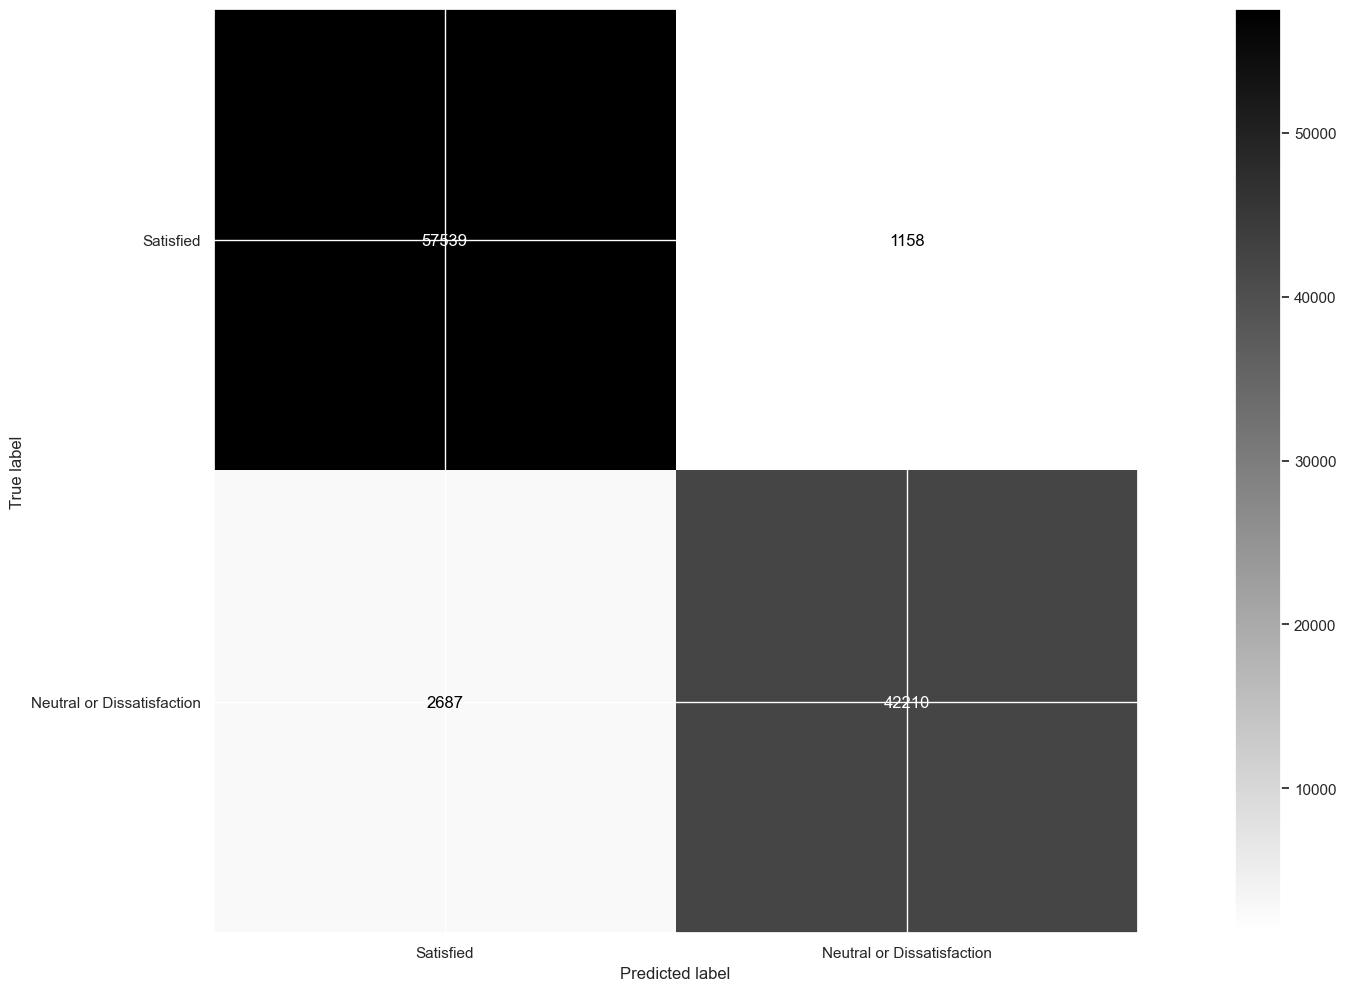



 fit_time : [29.9814353  27.93895936 27.43681288 25.83491278],  27.798030078411102 +/- 1.4808297357239886
 score_time : [1.30883908 1.35637879 1.43077683 1.33126044],  1.3568137884140015 +/- 0.04589462731900226
 test_Accuracy : [0.96366655 0.96358933 0.96219785 0.96208201],  0.9628839364441404 +/- 0.0007456292742475025
 test_Precision : [0.97377558 0.97315189 0.97276265 0.97349823],  0.9732970895009929 +/- 0.0003795155459617451
 test_f1 : [0.95771737 0.95735154 0.95545748 0.95520073],  0.9564317808582554 +/- 0.0011139390617357474
 test_   Recall : [0.94218018 0.94205607 0.93875726 0.93757836],  0.9401429701085058 +/- 0.002019132171282629


array([0, 0, 1, ..., 0, 0, 0])

In [85]:
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train,y_train)
# y_predict = rf.predict(X_val)
# print("Metrics \n", classification_report(y_val,y_predict))

CVS(rf, X, y)

# model prod

In [89]:
np.random.seed(7)

preds = []
scores = []

params = {'alpha': 6.385986356860096e-05,
  'colsample_bytree': 0.8284784298391914,
  'gamma': 5.114179746041194,
  'lambda': 0.00031417893121740654,
  'learning_rate': 0.21963622374350286,
  'max_depth': 40,
  'min_child_weight': 0.21215371268176095,
  'subsample': 0.89731839369485}

model_xgb_tuned = XGBClassifier(**params)

#{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 100}
model_xgb_tuned.fit(X, y)  # yves modificou aqui de (X_train, y_train) para X, y
ypred_xgb_tunned=model_xgb_tuned.predict(X_val)
preds.append(ypred_xgb_tunned)
score = (f1_score(y_val, ypred_xgb_tunned))
scores.append(score)
print("XGBoost Classifier")
print(f"F1:{score}")

print(classification_report(y_val, ypred_xgb_tunned))
print(confusion_matrix(y_val, ypred_xgb_tunned))

XGBoost Classifier
F1:0.9912831047693076
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11681
           1       0.99      0.99      0.99      9038

    accuracy                           0.99     20719
   macro avg       0.99      0.99      0.99     20719
weighted avg       0.99      0.99      0.99     20719

[[11635    46]
 [  111  8927]]


In [134]:
X.shape[1]

23

# teste

In [136]:
data_test_raw = pd.read_csv('..\\base\\test.csv')

In [137]:
df_teste = data_test_raw.copy()

In [138]:
df_teste = rename_columns(df_teste)

In [139]:
df_teste.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes
0,19556,Female,Loyal Customer,52,Gift,Medium,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.00
1,90035,Female,Loyal Customer,36,Gift,Large,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.00
2,12360,Male,disloyal Customer,20,Gift,Medium,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.00
3,77959,Male,Loyal Customer,44,Gift,Large,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.00
4,36875,Female,Loyal Customer,49,Gift,Medium,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.00


In [140]:
df_teste.shape[1]

23

In [141]:
le = LabelEncoder()
df_teste['gender'] = le.fit_transform( df_teste['gender'] )
df_teste['customer_type'] = le.fit_transform( df_teste['customer_type'] )
df_teste['type_of_purchase'] = le.fit_transform( df_teste['type_of_purchase'] )
df_teste['store_size'] = le.fit_transform( df_teste['store_size'] )

In [142]:
selected_features = ['id', 'gender', 'customer_type', 'age', 'type_of_purchase',
       'store_size', 'store_distance', 'in_store_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self_store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes'
     
]

In [143]:
X_test = df_teste[selected_features]

In [144]:
X_test.shape[1]

23

In [145]:
predicao_xgb = model_xgb_tuned.predict(X_test)

In [146]:
df_final_lr = pd.concat([df_teste.id, pd.Series(predicao_xgb, name = 'Satisfaction')], axis=1)

df_final_lr.head()

,id,Satisfaction
0,19556,1
1,90035,1
2,12360,0
3,77959,1
4,36875,1


In [147]:
df_final_lr.to_csv('submission1.csv', index=False) #Arquivo de submissão pronto para ser enviado.